In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats

#### From the data.wold overview of this data:

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality
between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
these datasets under a regression approach. The support vector machine model achieved the
best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
analysis procedure).

Relevant Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables
are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.
The classes are ordered and not balanced (e.g. there are munch more normal wines than
excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
or poor wines. Also, we are not sure if all input variables are relevant. So
it could be interesting to test feature selection methods.



The unit "mg/dm³" stands for "milligrams per cubic decimeter", where "milligrams" is the unit of mass and "cubic decimeter" is the unit of volume.

It is used to measure the amount of a solute dissolved in a solvent. For example, if a solution contains 10 milligrams of a substance per cubic decimeter of solution, the concentration of the substance in that solution would be expressed as 10 mg/dm³.

In [3]:
df_red = pd.read_csv('https://query.data.world/s/xvy3biopsnfrfxfgialtawp6v477mk?dws=00000')

In [4]:
df_white = pd.read_csv('https://query.data.world/s/lmm2oc73ncl233bsk4m4pergggesuf?dws=00000')

In [5]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df_red.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df_white.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [8]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [16]:
def get_df():
    '''
    get_df pulls red and white wine df's from data.world url's,
    creates a new column for wine color, concats them and returns 
    them as a single pandas df.
    '''
    # Pull in red and white wine df's
    df_white = pd.read_csv(
        'https://query.data.world/s/lmm2oc73ncl233bsk4m4pergggesuf?dws=00000')
    df_red = pd.read_csv(
        'https://query.data.world/s/xvy3biopsnfrfxfgialtawp6v477mk?dws=00000')
    # add column for wine color before merging
    df_white['color']= 'white'
    df_red['color']= 'red'
    #concat them and return new df
    df= pd.concat([df_white, df_red], ignore_index=True)
    
    return df

In [17]:
df = get_df()

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [19]:
duplicates = df.duplicated()

In [21]:
duplicates.value_counts()

False    5320
True     1177
dtype: int64

In [22]:
def unique_rows(df):
    """
    Returns the input dataframe with only unique rows.
    """
    return df.drop_duplicates()

In [23]:
df = unique_rows(df)

In [24]:
df.shape

(5320, 13)

In [25]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white


In [109]:
def target_dist(df):
    '''
    target_dist takes in a pandas dataframe, then proceeds to plot
    the distribution of the target variable, quality rating.
    '''
    #define figure size
    plt.figure(figsize=(10, 5))
    # create histogram
    sns.histplot(x='quality', data=df, color='cyan', binwidth=0.5)
    # calculate mean
    mean_quality = df['quality'].mean()
    # add mean line
    plt.axvline(mean_quality, color='red', linestyle='--', label='Mean Quality')
    # add mean value as text label
    plt.text(mean_quality + .8, 1000, f'Mean Quality = {mean_quality:.2f}', 
             fontsize=10, color='red')
    # add labels and title
    plt.xlabel('Quality Rating')
    plt.title('Visualizing the Target Variable')
    # add legend and grid
    plt.legend()
    plt.grid(True, alpha=0.5, linestyle='--')
    # show plot
    plt.show()

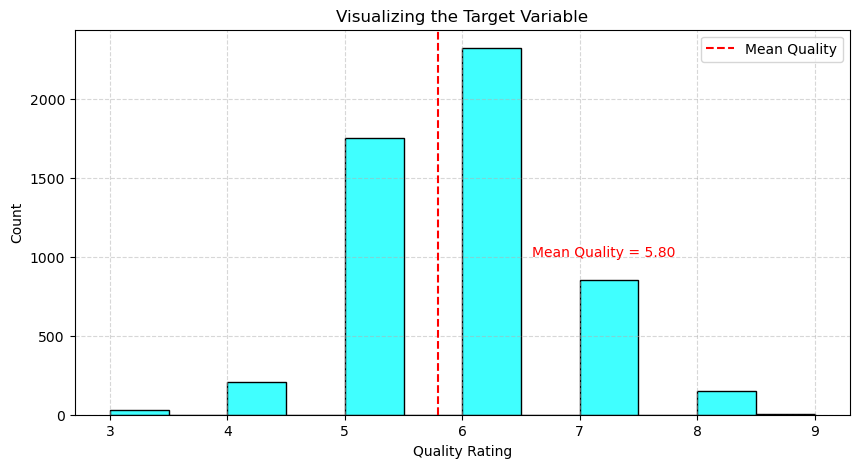

In [110]:
target_dist(df)

In [50]:
def train_val_test_split(df):
    '''
    takes in a pandas df, then splits between train, validate,
    and test subsets. 56/24/20 split
    '''
    train_validate, test=train_test_split(df, 
                                 train_size=.8, 
                                 random_state=828)
    
    train, validate =train_test_split(train_validate, 
                                      test_size=.3, 
                                      random_state=828)
    return train, validate, test

In [53]:
train, validate, test = train_val_test_split(df)

In [54]:
train.shape, validate.shape, test.shape

((2979, 13), (1277, 13), (1064, 13))

Exploration Question 1:
Is the mean alcohol content in high quality wine (7 and up) significantly higher than the alcohol content of wine with lower quality ratings (6 and below) ?
- 
H0: There is not a significant difference in the average alcohol content between high quality wine (7-9) and wine with lower quality ratings (6 and below)
- 
Ha: There is a significant difference in the average alcohol content between high quality wine (7-9) and wine with lower quality ratings (6 and below)

In [119]:
def abv_plots(train):
    '''
    abv_plots takes in train data and produces a histplot comparing the mean ABV of 
    high quality wines versus lower quality wines.
    '''
    # identify low and high quality wines
    high= train[train['quality'] >= 7]
    low= train[train['quality'] <= 6]
    #define figure size
    plt.figure(figsize=(10, 5))
    # set title
    plt.title('High and Low Quality Wine ABV Compared')
    # identify low and high rated means
    mean_low_qual = low['alcohol'].mean()
    mean_high_qual = high['alcohol'].mean()
    # plot data
    sns.histplot(x='alcohol', data=low, alpha=.5, label= 'Lower Quality', color='orange')
    sns.histplot(x='alcohol', data=high, alpha=.3, label='High Quality', color='magenta')
    plt.xlabel(' % Alcohol by Volume')
    # draw low quality mean line
    plt.axvline(x=mean_low_qual, label='Lower Quality Mean ABV', color='orange')
    plt.text(mean_low_qual + 1.45, 150, f'Lower Quality Mean ABV = {mean_low_qual:.1f}%', 
             fontsize=10, color='red')
    # draw high quality mean line
    plt.axvline(x= mean_high_qual, label='High Quality Mean ABV', color='magenta')
    plt.text(mean_high_qual + .2, 200, f'High Quality Mean ABV= {mean_high_qual:.1f}%', 
             fontsize=10, color='red')
    # produce legen
    plt.legend()
    # show gridlines for easy reading
    plt.grid(True, alpha=0.75, linestyle='--')
    # show the vis
    plt.show()

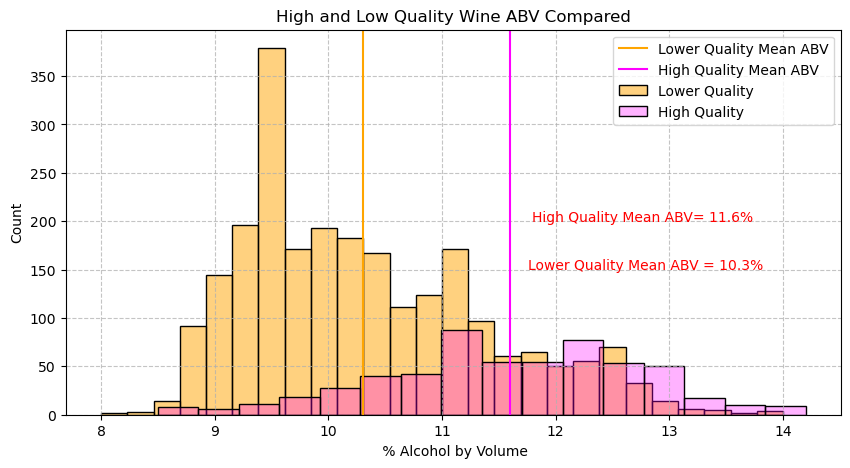

In [120]:
abv_plots(train)

In [132]:
def abv_tstat(train):
    '''
    abv_tstat takes in train data, the performs a two-sample t-test 
    comparing high quality and lower quality wines based on ABV.
    '''
    # create two samples
    high_quality = train[train['quality']>= 7]['alcohol']
    low_quality = train[train['quality'] <= 6]['alcohol']

    # perform two-sample t-test
    t_statistic, p_value = stats.ttest_ind(high_quality, low_quality, equal_var=True)

    # print results
    print(f"t-statistic: {t_statistic:.2f}")
    print(f"p-value: {p_value:.4f}")


In [130]:
high_quality.var()

1.2523418399261341

In [127]:
low_quality.var()

1.1399079140267898

In [131]:
abv_tstat(train)

t-statistic: 25.77
p-value: 0.0000
